## INFS3081 Predictive Analytics

### Practical Activity: Data Manipulation and Feature Selection

This notebook is an exercise for performing data preprocessing and manipulation, including the following tasks:
- Handling missing values
- Performing feature selection and feature filtering

We apply the concepts discussed in Data Exploration and Data Preprocessing.

We will use the following python libraries for this practical:
- numpy https://numpy.org/
- pandas https://pandas.pydata.org/
- scikit-learn https://scikit-learn.org/stable/

### Diabetes Dataset

Our aim is to build a classification model to predict diabetes. We will be using the diabetes dataset which contains 768 observations and 9 variables, as below:
- **Pregnancies**: Number of times pregnant.
- **Glucose**: Plasma glucose concentration [2 hours in an oral glucose tolerance test].
- **BloodPressure**: Diastolic blood pressure (mm Hg).
- **Skin Thickness**: Triceps skinfold thickness (mm).
- **Insulin**: 2-hour serum insulin (mu U/ml).
- **BMI**: Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: Diabetes pedigree function.
- **Age**: Age in years.
- **Outcome**: "1" represents the presence of diabetes, while "0" represents absence.

The dataset was downloaded from https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Task 1. Handling missing values

Missing values are one of the main obstacles in building predictive models. It is important to explore various approaches to imputing missing values and understand the reasons for selecting a specific method. By doing so, you can ensure your data is as complete and accurate as possible before training and evaluating your predictive models.

#### Step 1 - Loading the required libraries and modules.

In [ ]:
#
# * import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# function that renders the figure in a notebook
%matplotlib inline

In [ ]:
#
# * Load the dataset
df = pd.read_csv("./diabetes.csv")

### Step 2 - Describing and Summarising the dataset

In [5]:
#
# * return the number of rows and columns in the dataframe
df.shape

(768, 9)

In [6]:
#
# * return the first 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#
# * return a concise sumary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#
# * return a descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 3 - Handling missing values
In this step, we explore three common techniques for dealing with missing values in datasets. Proper handling of missing data is essential to ensure the reliability and accuracy of models.

#### 1. Removing Rows with Missing Values
- This method involves deleting rows that contain missing values.
- It is simple but can lead to loss of valuable data, especially if missing values are widespread.

#### 2. Imputing Missing Values with a Summary Statistic (Mean, Median, or Mode)
Instead of removing missing values, they can be replaced with a representative value:
- **Mean**: Suitable for normally distributed data.
- **Median**: More robust for skewed data or when outliers are present.
- **Mode**: Works well for categorical data by filling in the most frequent value.

#### 3. Imputing Missing Values Using an Estimator
- A more advanced method where a predictive model (e.g., regression, kNN, or decision trees) is used to estimate and fill missing values based on existing data patterns.

Based on the descriptive analysis, it is evident that the following columns may **have invalid zero values**, which should be treated as missing data: Glucose, BloodPressure, SkinThickness, Insulin, BMI. These zero values are likely invalid and should be addressed using one of the methods above to improve the quality of the dataset.


In [9]:
#
# * Columns where zeros should be replaced with NaN
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# * Replace zeros with NaN in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

#### Approach 1: Removing rows with missing values

In [10]:
#
# * make a copy of the dataset
df_dropna = df.copy()

In [11]:
#
# * drop the rows with NaN values
df_dropna.dropna(inplace=True)

In [12]:
#
# * return the number of rows and columns in the dataframe after dropping NaN values
df_dropna.shape

(392, 9)

In [13]:
df_dropna.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#
# * check if there are still missing values in the dataset
df_dropna.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Approach 2: Imputing missing values with the mean
We can impute missing values with the mean using two different approaches. One way is to use **Pandas** `fillna()` function.

In [15]:
#
# * make two copies of the dataset
df_mean_a1 = df.copy()
df_mean_a2 = df.copy()

In [16]:
#
# * fill missing values with the mean of the column
df_mean_a1.fillna(df_mean_a1.mean(), inplace=True)

In [17]:
df_mean_a1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#
# * check if there are still missing values in the dataset
df_mean_a1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

One other way is to use scikit-learn `SimpleImputer` object. The `SimpleImputer` class provides straightforward strategies for handling missing values in a datset. Missing values can be replaced with a specified constant or with a statistical measure such as the **mean**, **median**, or **most frequent** value from each column containing missing data. For comparison purposes, we use the **mean** in this example.

Keep in mind that `SimpleImputer` class supports different encodings for missing values, making it flexible for various datasets and data cleaning scenarios.

In [19]:
#
# * retrieve the numpy array as the SimpleImputer object operates
# * directly on the numpy array instead of pandas dataframe
values_mean = df_mean_a2.values
# * initialise the simple imputer and specify the replacing value
# * as the column mean.
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# * fit the imputer on the data
transformed_mean = imputer.fit_transform(values_mean)

In [20]:
#
# * count the number of missing values in the dataset
print("Missing: %d" % np.isnan(transformed_mean.sum()))

Missing: 0


In [21]:
transformed_mean

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]],
      shape=(768, 9))

In [22]:
transformed_mean.mean(axis=0)

array([  3.84505208, 121.68676278,  72.40518417,  29.15341959,
       155.54822335,  32.45746367,   0.4718763 ,  33.24088542,
         0.34895833])

___
If you're curious to learn more about how to handle missing data effectively, check out this additional resource:

👉 [Statistical Imputation for Missing Values in Machine](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/)
___

#### Approach 3: Imputing missing values using an estimator

In [23]:
#
# * we make another copy of the dataset
df_estimator = df.copy()

In [24]:
#
# * Impute missing values in df_estimator using IterativeImputer with 50 iterations
values_estimator = df_estimator.values
imputer_iterative = IterativeImputer(max_iter=50, random_state=1)
transformed_estimator = imputer.fit_transform(values_estimator)

In [25]:
#
# * count the number of missing values in the dataset
print("Missing: %d" % np.isnan(transformed_estimator.sum()))

Missing: 0


In [26]:
transformed_estimator

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]],
      shape=(768, 9))

In [28]:
transformed_estimator.mean(axis=0)

array([  3.84505208, 121.68676278,  72.40518417,  29.15341959,
       155.54822335,  32.45746367,   0.4718763 ,  33.24088542,
         0.34895833])

___
To explore more about imputation methods in scikit-learn, check out this official documentation:

👉 [Imputation of Missing Values](https://scikit-learn.org/stable/modules/impute.html)

It provides a comprehensive guide on different imputation strategies and how to apply them in your machine learning workflows!
___

### Task 2. Performing feature selection and feature filtering
When working with datasets, you will often encounter a large number of features (or dimensions). Selecting only the most relevant ones is crucial for improving model performance. This process, known as **feature selection**, helps remove redundant or irrelevant features, making the model easier to interpret, speeding up the learning process, and often boosting predictive accuracy.

There are several common approaches to feature selection:
- **Brute-force approach** - Tries all possible feature subsets to determine the best combination.
- **Embedded methods** - Feature selection happens naturally as part of the learning algorithm.
- **Filter methods** - Features are ranked based on statistical scores before training the model.
- **Wrapper methods** - The model itself is used to evaluate and select the best subset of features.

For this task, we will focus on **filter methods**, which rank features based on importance scores. Specifically, we will use scikit-learn's `mutual_info_classif` and `SelectKBest` to select the most relevant features.

📌 **Learn more about these methods here:** 
- [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)
- [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)


#### Step 1 - Visualising the dataset

In [29]:
#
# * return counts of the unique values in each column
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163.0    72.0           41.0           114.0    40.9  0.817                     47   1          1
0            74.0     52.0           10.0           36.0     27.8  0.269                     22   0          1
             78.0     88.0           29.0           40.0     36.9  0.434                     21   0          1
             84.0     64.0           22.0           66.0     35.8  0.545                     21   0          1
                      82.0           31.0           125.0    38.2  0.233                     23   0          1
                                                                                                            ..
             98.0     82.0           15.0           84.0     25.2  0.299                     22   0          1
             97.0     64.0           36.0           100.0    36.8  0.600                     25   0          1
      

**Try it yourself: Why the above value_counts() function returns only 392 records?**

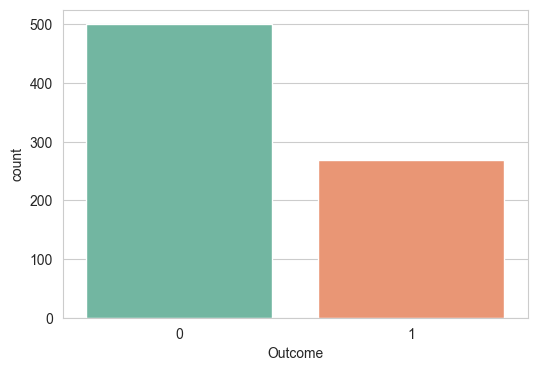

In [37]:
#
# * distribution of the target variable
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df, palette="Set2", hue="Outcome", legend=False)

Text(0.5, 1.0, 'Correlation among variables')

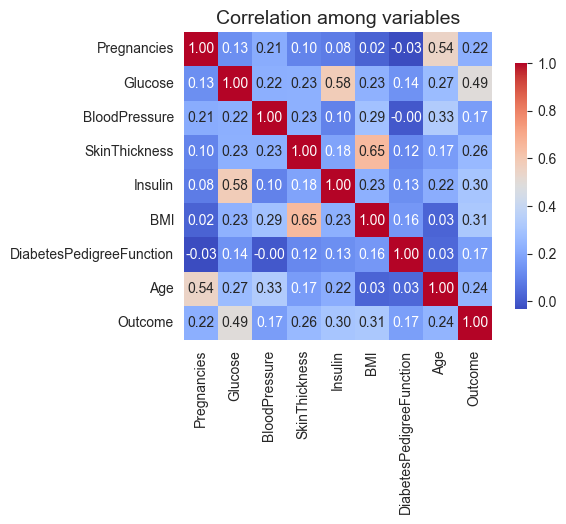

In [38]:
#
# * correlation among variables
plt.figure(figsize=(6, 4))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation among variables", fontsize=14)

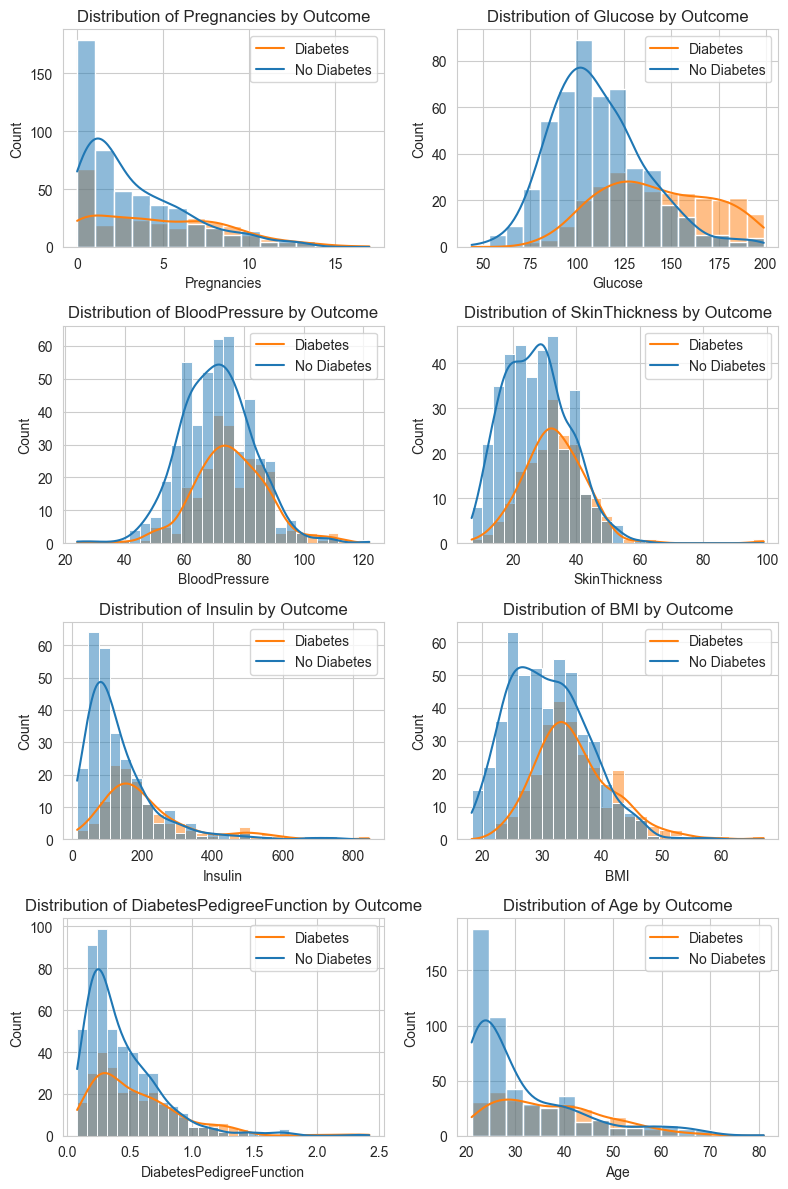

In [39]:
#
# * Function to plot distributions with 2 per row
def plot_distribution2(df):
    """
    Plot the distribution of each feature in the DataFrame with 2 subplots per row.
    """
    columns = [col for col in df.columns if col != "Outcome"]
    num_cols = len(columns)

    # Set up subplots: 2 plots per row
    rows = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(rows, 2, figsize=(8, 3 * rows))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(data=df, x=column, hue=df["Outcome"], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {column} by Outcome")
        axes[i].legend(["Diabetes", "No Diabetes"])

    # Hide empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


# * Call the function
plot_distribution2(df)

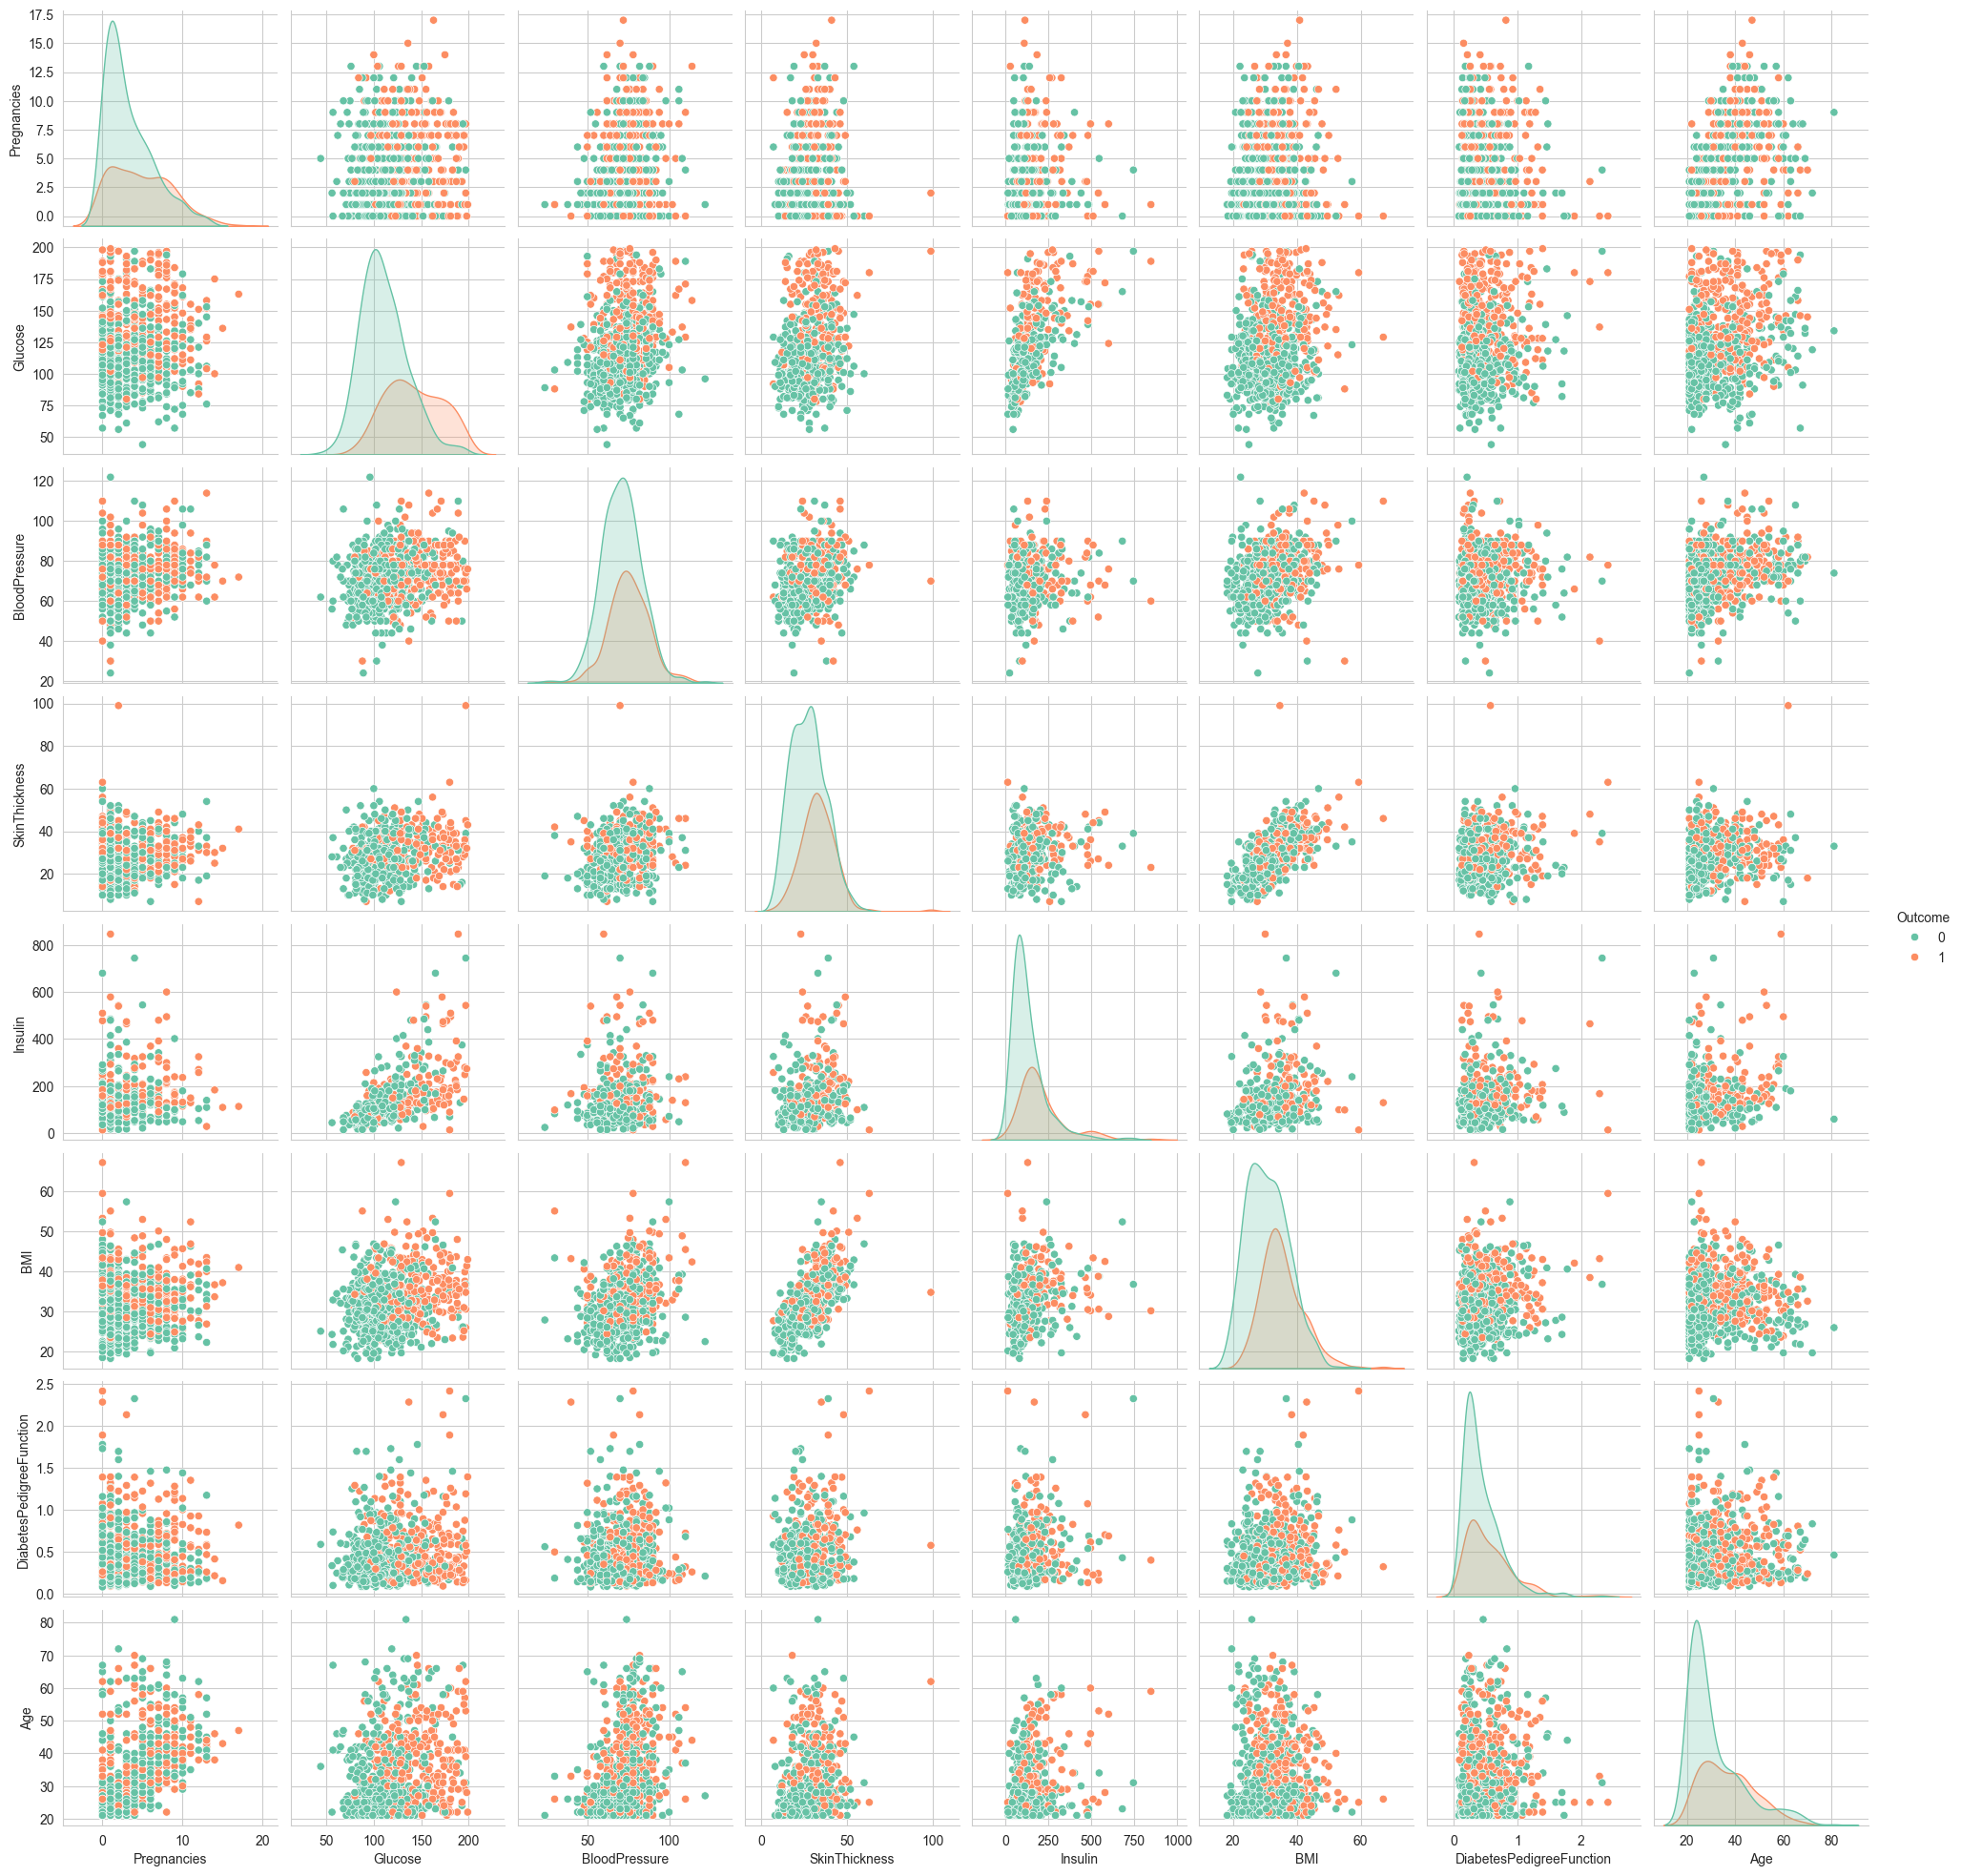

In [40]:
#
# * pairplot of the dataset
sns.pairplot(df, hue="Outcome", palette="Set2", diag_kind="kde", height=2.5)

#### Step 2 - Selecting the best k features using mutual information

In [41]:
#
# * Separate features from the target variable.
# * Using df_dropna since SelectKBest does not work with NaN values.
feature_columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]

features = df_dropna[feature_columns].values
target = df_dropna["Outcome"].values

In [42]:
features

array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
       [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]],
      shape=(392, 8))

In [43]:
target

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [47]:
#
# * Define the number of most relevant features
threshold = 5

# * Initialise SelectKBest with mutual information as the scoring function
skb = SelectKBest(score_func=mutual_info_classif, k=threshold)

# * Fit the selector to the data
sel_skb = skb.fit(features, target)

# * Get the boolean mask of selected features
sel_skb_index = sel_skb.get_support()

# * Extract the selected features
df_skb = features[:, sel_skb_index]

# * Print feature scores and selected features
print("Feature scores:", sel_skb.scores_)
print("Selected Features:\n", df_skb)

# ! Selected: "Pregnacies"(0), "Glucose"(1), "Insulin"(4), "BMI"(5), "Age"(7)

Feature scores: [0.05023092 0.15709654 0.05398421 0.01586706 0.08937001 0.05187896
 0.         0.06544549]
Selected Features:
 [[ 89.   66.   94.   28.1  21. ]
 [137.   40.  168.   43.1  33. ]
 [ 78.   50.   88.   31.   26. ]
 ...
 [ 88.   58.   16.   28.4  22. ]
 [101.   76.  180.   32.9  63. ]
 [121.   72.  112.   26.2  30. ]]


___
**Additional Reference on Feature Selection**

If you are interested in exploring more feature selection techniques, check out the official scikit-learn documentation:

👉 [Feature Selection in Scikit-Learn](https://scikit-learn.org/stable/api/sklearn.feature_selection.html)
___